## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import toolz as tlz
%matplotlib inline

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [4]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68
1,98.4,F,81
2,97.8,M,73
3,99.2,F,66
4,98.0,F,73


### Is the distribution of body temperatures normal? 

Histogram of temperature frequencies and scipy normaltest both show a fairly normal distribution.

The chi-squared statistic is 2.7038 and the p-value is 0.2587.


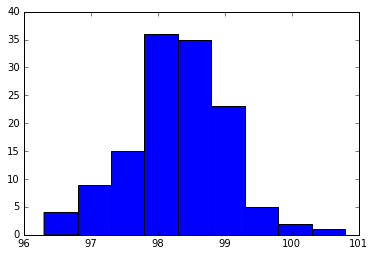

In [5]:
plt.hist(df.temperature, 9);
normal_test = stats.normaltest(df.temperature)
print("The chi-squared statistic is %.4f and the p-value is %.4f." % normal_test)

### Is the true population mean really 98.6&deg;F?
##### Z-statistic:
$z = \frac{x^{n} - \mu_{\bar{x}}}{\frac{S}{\sqrt{n}}}$

Since we are testing the population mean, the population standard deviation is unknown, and the sample size is larger than 30; we will use the z-statistic with a two-tailed hypothesis test:

$H_{0}: \mu = {98.6}$

$H_{a}: \mu \neq {98.6}$

In [52]:
#Sample mean
sm = np.mean(df.temperature)

#Sample standard deviation
ssd = np.std(df.temperature)

#Sample size
ss = len(df.temperature)

#Standard error
se = stats.sem(df.temperature)

print("The sample mean is %.2f, the sample standard deviation is %.2f, the sample size is %g, and the standard error is %.2f." 
      % (sm, ssd, ss, se))

The sample mean is 98.25, the sample standard deviation is 0.73, the sample size is 130, and the standard error is 0.06.


In [56]:
#Calculate the Z score
zscore = (sm-98.6)/(se)
print("The z score is %.2f." % zscore)

The z score is -5.45.


In [61]:
#Calculate the p value
pval = stats.norm.cdf(zscore)
print("The p value for the z score is %.8f%%" % (pval*100))

The p value for the z score is 0.00000245%


### The null hypothesis should be rejected.


In [82]:
#Use scipy.stats to calculate the t statistic
#As another test
one_sample = stats.ttest_1samp(df.temperature, 98.6)
print("The t-statistic is %.3f and the p-value is %g." % one_sample)

The t-statistic is -5.455 and the p-value is 2.41063e-07.


### At what temperature should we consider someone's temperature to be "abnormal"?
#### Start by computing the margin of error and confidence interval.

In [68]:
#The margin of error is the appropriate z score multiplied by the standard error.
#We will use the z score for a 95% confidence interval (1.96) and the standard error of the sample calculated above.
#Margin of Error
me = 1.96 * se
print("The margin of error is %.2f" % me)

The margin of error is 0.13


In [70]:
#Using the sample mean from earlier we can find the range of heights.
print("Temperatures would be considered abnormal below %.2f and above %.2f" % (sm - me, sm + me))

Temperatures would be considered abnormal below 98.12 and above 98.38


### Is there a significant difference between males and females in normal temperature?
#### Set up and solve for a two sample hypothesis testing.


In [77]:
#Male temperatures
males = df[df.gender == "M"].temperature
len(males)

65

In [78]:
#Female temperatures
females = df[df.gender == "F"].temperature
len(females)

65

#### Below are the null hypythesis and alterative hypothesis for the means of the the male and female temperatures.

$H_{0}: \mu_{m} = \mu_{f}$

$H_{a}: \mu_{m} \neq \mu_{f}$

In [84]:
#Female mean
fem = females.mean()
#Male mean
mam = males.mean()
print("The male temperature mean is %.2f and the female mean is %.2f." % (mam, fem))

The male temperature mean is 98.10 and the female mean is 98.39.


In [88]:
gender_comp = stats.ttest_ind(males,females)
print("The statistic is %.3f and the p value is %.3f." % gender_comp)

The statistic is -2.285 and the p value is 0.024.


### The null hypothesis would be rejected at confidence intervals of 10% and 5%, but accepted at 1%